In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
df = pd.read_csv('results/sim_trace.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36 non-null     int64  
 1   type            36 non-null     object 
 2   app             36 non-null     int64  
 3   module          36 non-null     object 
 4   message         36 non-null     object 
 5   DES.src         36 non-null     int64  
 6   DES.dst         36 non-null     int64  
 7   TOPO.src        36 non-null     int64  
 8   TOPO.dst        36 non-null     int64  
 9   module.src      36 non-null     object 
 10  service         36 non-null     float64
 11  time_in         36 non-null     float64
 12  time_out        36 non-null     float64
 13  time_emit       36 non-null     float64
 14  time_reception  36 non-null     float64
dtypes: float64(5), int64(6), object(4)
memory usage: 4.3+ KB


In [6]:
df.head(50)

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,4,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,0.05,101.00002,101.05002,100.0,101.00002
1,1,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,0.05,102.00001,102.05001,100.0,102.00001
2,2,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,0.05,102.00001,102.05001,100.0,102.00001
3,3,COMP_M,2,2_01,M.USER.APP.2,2,6,3,0,None,0.05,104.00002,104.05002,100.0,104.00002
4,8,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,0.05,201.00002,201.05002,200.0,201.00002
5,5,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,0.05,202.00001,202.05001,200.0,202.00001
6,6,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,0.05,202.00001,202.05001,200.0,202.00001
7,7,COMP_M,2,2_01,M.USER.APP.2,2,6,3,0,None,0.05,204.00002,204.05002,200.0,204.00002
8,12,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,0.05,301.00002,301.05002,300.0,301.00002
9,9,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,0.05,302.00001,302.05001,300.0,302.00001


In [7]:
df_link = pd.read_csv('results/sim_trace_link.csv')

In [9]:
df_link.head(50)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,1,0,0,2.00001,M.USER.APP.0,100.00000,20,0
1,2,LINK,2,0,1,2.00001,M.USER.APP.1,100.00000,20,1
2,3,LINK,3,2,2,2.00001,M.USER.APP.2,100.00000,20,2
3,4,LINK,4,0,3,1.00002,M.USER.APP.3,100.00000,20,3
4,3,LINK,2,0,2,2.00001,M.USER.APP.2,102.00001,20,0
5,5,LINK,1,0,0,2.00001,M.USER.APP.0,200.00000,20,0
6,6,LINK,2,0,1,2.00001,M.USER.APP.1,200.00000,20,1
7,7,LINK,3,2,2,2.00001,M.USER.APP.2,200.00000,20,2
8,8,LINK,4,0,3,1.00002,M.USER.APP.3,200.00000,20,3
9,7,LINK,2,0,2,2.00001,M.USER.APP.2,202.00001,20,0


In [7]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [8]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [17]:
df.head(50)

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:01:41,4,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,...,101.00002,101.15002,100.0,101.00002,1.00002,0.0,0.15,0.15,1.15002,1970-01-01 00:01:41
1970-01-01 00:01:42,1,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,...,102.00001,102.15001,100.0,102.00001,2.00001,0.0,0.15,0.15,2.15001,1970-01-01 00:01:42
1970-01-01 00:01:42,2,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,...,102.00001,102.15001,100.0,102.00001,2.00001,0.0,0.15,0.15,2.15001,1970-01-01 00:01:42
1970-01-01 00:01:44,3,COMP_M,2,2_01,M.USER.APP.2,2,6,3,0,None,...,104.00002,104.15002,100.0,104.00002,4.00002,0.0,0.15,0.15,4.15002,1970-01-01 00:01:44
1970-01-01 00:03:21,8,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,...,201.00002,201.15002,200.0,201.00002,1.00002,0.0,0.15,0.15,1.15002,1970-01-01 00:03:21
1970-01-01 00:03:22,5,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,...,202.00001,202.15001,200.0,202.00001,2.00001,0.0,0.15,0.15,2.15001,1970-01-01 00:03:22
1970-01-01 00:03:22,6,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,...,202.00001,202.15001,200.0,202.00001,2.00001,0.0,0.15,0.15,2.15001,1970-01-01 00:03:22
1970-01-01 00:03:24,7,COMP_M,2,2_01,M.USER.APP.2,2,6,3,0,None,...,204.00002,204.15002,200.0,204.00002,4.00002,0.0,0.15,0.15,4.15002,1970-01-01 00:03:24
1970-01-01 00:05:01,12,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,...,301.00002,301.15002,300.0,301.00002,1.00002,0.0,0.15,0.15,1.15002,1970-01-01 00:05:01


In [10]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [11]:
df_resample.shape

(9, 1)

In [12]:
timeLatency = df_resample.time_latency.values

In [13]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

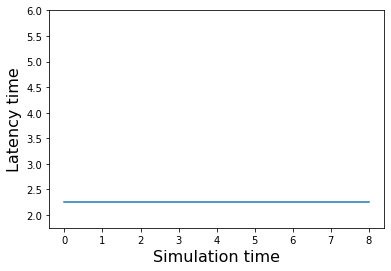

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

In [50]:
G = nx.read_graphml('results/graph_complete_5.graphml')

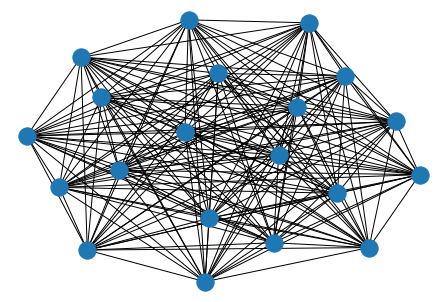

In [51]:
nx.draw(G)

In [52]:
nx.get_edge_attributes(G, "weight")

{('0', '1'): 1,
 ('0', '2'): 3,
 ('0', '3'): 1,
 ('0', '4'): 2,
 ('0', '5'): 1,
 ('0', '6'): 3,
 ('0', '7'): 3,
 ('0', '8'): 4,
 ('0', '9'): 2,
 ('0', '10'): 1,
 ('0', '11'): 4,
 ('0', '12'): 1,
 ('0', '13'): 1,
 ('0', '14'): 4,
 ('0', '15'): 2,
 ('0', '16'): 3,
 ('0', '17'): 3,
 ('0', '18'): 4,
 ('0', '19'): 2,
 ('1', '2'): 2,
 ('1', '3'): 1,
 ('1', '4'): 2,
 ('1', '5'): 2,
 ('1', '6'): 3,
 ('1', '7'): 3,
 ('1', '8'): 1,
 ('1', '9'): 4,
 ('1', '10'): 2,
 ('1', '11'): 1,
 ('1', '12'): 4,
 ('1', '13'): 4,
 ('1', '14'): 3,
 ('1', '15'): 3,
 ('1', '16'): 4,
 ('1', '17'): 3,
 ('1', '18'): 2,
 ('1', '19'): 1,
 ('2', '3'): 4,
 ('2', '4'): 1,
 ('2', '5'): 3,
 ('2', '6'): 1,
 ('2', '7'): 3,
 ('2', '8'): 2,
 ('2', '9'): 2,
 ('2', '10'): 4,
 ('2', '11'): 3,
 ('2', '12'): 3,
 ('2', '13'): 3,
 ('2', '14'): 2,
 ('2', '15'): 3,
 ('2', '16'): 4,
 ('2', '17'): 4,
 ('2', '18'): 1,
 ('2', '19'): 1,
 ('3', '4'): 2,
 ('3', '5'): 3,
 ('3', '6'): 2,
 ('3', '7'): 2,
 ('3', '8'): 2,
 ('3', '9'): 4,
 ('3', '10

In [53]:
G.edges()

EdgeView([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('0', '7'), ('0', '8'), ('0', '9'), ('0', '10'), ('0', '11'), ('0', '12'), ('0', '13'), ('0', '14'), ('0', '15'), ('0', '16'), ('0', '17'), ('0', '18'), ('0', '19'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '8'), ('1', '9'), ('1', '10'), ('1', '11'), ('1', '12'), ('1', '13'), ('1', '14'), ('1', '15'), ('1', '16'), ('1', '17'), ('1', '18'), ('1', '19'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6'), ('2', '7'), ('2', '8'), ('2', '9'), ('2', '10'), ('2', '11'), ('2', '12'), ('2', '13'), ('2', '14'), ('2', '15'), ('2', '16'), ('2', '17'), ('2', '18'), ('2', '19'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '7'), ('3', '8'), ('3', '9'), ('3', '10'), ('3', '11'), ('3', '12'), ('3', '13'), ('3', '14'), ('3', '15'), ('3', '16'), ('3', '17'), ('3', '18'), ('3', '19'), ('4', '5'), ('4', '6'), ('4', '7'), ('4', '8'), ('4', '9'), ('4', '10'), ('4', '11'), ('4', '12'), ('4', '13')

In [54]:
L = list(G.edges())

In [55]:
L

[('0', '1'),
 ('0', '2'),
 ('0', '3'),
 ('0', '4'),
 ('0', '5'),
 ('0', '6'),
 ('0', '7'),
 ('0', '8'),
 ('0', '9'),
 ('0', '10'),
 ('0', '11'),
 ('0', '12'),
 ('0', '13'),
 ('0', '14'),
 ('0', '15'),
 ('0', '16'),
 ('0', '17'),
 ('0', '18'),
 ('0', '19'),
 ('1', '2'),
 ('1', '3'),
 ('1', '4'),
 ('1', '5'),
 ('1', '6'),
 ('1', '7'),
 ('1', '8'),
 ('1', '9'),
 ('1', '10'),
 ('1', '11'),
 ('1', '12'),
 ('1', '13'),
 ('1', '14'),
 ('1', '15'),
 ('1', '16'),
 ('1', '17'),
 ('1', '18'),
 ('1', '19'),
 ('2', '3'),
 ('2', '4'),
 ('2', '5'),
 ('2', '6'),
 ('2', '7'),
 ('2', '8'),
 ('2', '9'),
 ('2', '10'),
 ('2', '11'),
 ('2', '12'),
 ('2', '13'),
 ('2', '14'),
 ('2', '15'),
 ('2', '16'),
 ('2', '17'),
 ('2', '18'),
 ('2', '19'),
 ('3', '4'),
 ('3', '5'),
 ('3', '6'),
 ('3', '7'),
 ('3', '8'),
 ('3', '9'),
 ('3', '10'),
 ('3', '11'),
 ('3', '12'),
 ('3', '13'),
 ('3', '14'),
 ('3', '15'),
 ('3', '16'),
 ('3', '17'),
 ('3', '18'),
 ('3', '19'),
 ('4', '5'),
 ('4', '6'),
 ('4', '7'),
 ('4', '8')

In [56]:
solver = acopy.Solver(rho=.03, q=1)

In [57]:
colony = acopy.Colony(alpha=1, beta=3)

In [58]:
tour = solver.solve(G, colony, limit=100)

In [59]:
G['0']['2']["weight"]

3

In [60]:
a = G.get_edge_data('12', '13')

In [61]:
print(a)

{'PR': 1, 'BW': 1, 'weight': 4, 'pheromone': 0.15747039231266985}


In [62]:
tour.cost

20

In [63]:
tour.path

[('18', '6'),
 ('6', '2'),
 ('2', '4'),
 ('4', '19'),
 ('19', '14'),
 ('14', '8'),
 ('8', '1'),
 ('1', '3'),
 ('3', '15'),
 ('15', '5'),
 ('5', '11'),
 ('11', '9'),
 ('9', '7'),
 ('7', '10'),
 ('10', '17'),
 ('17', '12'),
 ('12', '0'),
 ('0', '13'),
 ('13', '16'),
 ('16', '18')]

In [64]:
tour.nodes

['18',
 '6',
 '2',
 '4',
 '19',
 '14',
 '8',
 '1',
 '3',
 '15',
 '5',
 '11',
 '9',
 '7',
 '10',
 '17',
 '12',
 '0',
 '13',
 '16']